LAB 1 DATA 202 MATH METHOD FOR DATA ANALYTICS 

1.Variables in the dataset categories 


a.Nominal category : categorical data that has no inherent order

b.Binary category  : categorical data that has only two possible values - 
    famhist , 
    chd   

c.Discrete category : categorical data that has a countable number of distinct values - 
    typea,
    age 
    
d.Continuous category : numerical data that can take any value within a range  - 
    sbp ,
    ldl , 
    adiposity,
    obesity,
    tobacco,
    alcohol   

2.To find number of Null Values for each columns 

STEPS:

a.Load dataset 

b.Check for null values in each columns
 
c.Print result 

In [1]:
import pandas as pd

df = pd.read_csv('heart_dataset.csv')

null_values = df.isnull().sum()

print(null_values)


sbp          28
tobacco      40
ldl          39
adiposity    40
famhist      45
typea        41
obesity      40
alcohol      40
age          35
chd          39
dtype: int64


3.Descriptive Analysis 

3.1 General descriptive statistics by using describe function

In [4]:
descriptive_stats = df.describe()

print("Descriptive Statistics :\n",descriptive_stats)

Descriptive Statistics :
               sbp     tobacco         ldl   adiposity       typea     obesity  \
count  384.000000  372.000000  373.000000  372.000000  371.000000  372.000000   
mean   139.216146    3.676425    4.569303   25.210753   52.008086   25.763602   
std     20.307368    4.568564    1.888691    7.760257    9.822888    3.854265   
min    101.000000    0.000000    0.980000    7.120000   20.000000   17.890000   
25%    124.000000    0.057500    3.240000   19.307500   46.000000   22.835000   
50%    136.000000    1.800000    4.220000   26.115000   52.000000   25.675000   
75%    148.500000    5.640000    5.470000   30.790000   58.000000   28.167500   
max    218.000000   27.400000   14.160000   42.490000   73.000000   40.340000   

          alcohol         age         chd  
count  372.000000  377.000000  373.000000  
mean    18.425134   42.453581    0.335121  
std     25.971090   15.312649    0.472667  
min      0.000000   15.000000    0.000000  
25%      0.195000   30.0

3.2 Age of the oldest person and  the people with that age

In [5]:
oldest_person_age = df['age'].max()
people_of_oldest_age = df[df['age'] == oldest_person_age]
print("oldest_person_age : ", oldest_person_age)
print("people_of_oldest_age :\n ", people_of_oldest_age)


oldest_person_age :  64.0
people_of_oldest_age :
         sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol   age  \
58   158.0     3.60  2.97        NaN   Absent    NaN    26.64   108.00  64.0   
70   152.0    12.18  4.04      37.83  Present   63.0    34.57     4.17  64.0   
110  126.0     0.00  5.98      29.06  Present   56.0    25.39    11.52  64.0   
167  148.0     8.20  7.75      34.46  Present   46.0    26.53     6.04  64.0   
170  128.0     5.16  4.90        NaN  Present   57.0    26.42     0.00  64.0   
206    NaN     8.60  3.90      32.16  Present   52.0    28.51    11.11  64.0   
241  160.0     0.60  6.94      30.53   Absent   36.0    25.68     1.42  64.0   
256  138.0     2.00  5.11      31.40  Present   49.0    27.25     2.06  64.0   
276  128.0     0.73  3.97      23.52   Absent    NaN    23.81      NaN  64.0   
348  140.0     8.60  3.90      32.16  Present   52.0    28.51    11.11  64.0   
374  160.0     0.60  6.94      30.53   Absent   36.0    25.68      Na

3.3 Age of youngest person and  the people with that age

In [6]:
youngest_person_age = df['age'].min()
people_of_youngest_age = df[df['age'] == youngest_person_age]
print("youngest_person_age : ", youngest_person_age)
print("people_of_youngest_age :\n ", people_of_youngest_age)

youngest_person_age :  15.0
people_of_youngest_age :
        sbp  tobacco   ldl  adiposity famhist  typea  obesity  alcohol   age  \
9   132.0      0.0  1.87      17.21  Absent   49.0    23.63     0.97  15.0   
38    NaN      0.0  3.67      12.13  Absent    NaN    19.15     0.60  15.0   

    chd  
9   0.0  
38  0.0  


3.4 Average and standard deviation of age column 

In [7]:
average_age = df['age'].mean()
standard_deviation_age = df['age'].std()

print("Average_age : ", average_age)
print("Standard_deviation_of_age : ", standard_deviation_age)

Average_age :  42.45358090185676
Standard_deviation_of_age :  15.31264927550187


3.5 Median age 

In [8]:
Median_age = df['age'].median()

print("Median age: ", Median_age)

Median age:  45.0


3.6 Bar chart that represents the relationship between the deaths and ages and draw an insights 
from the chart (you can filter by chd==1 and draw a histogram) 

- import matplotlib and seaborn 
- Filter the dataset for people with coronary heart disease (chd == 1)
- Create a histogram to visualize the distribution of ages for people with chd
- Add labels and title
- show the plot

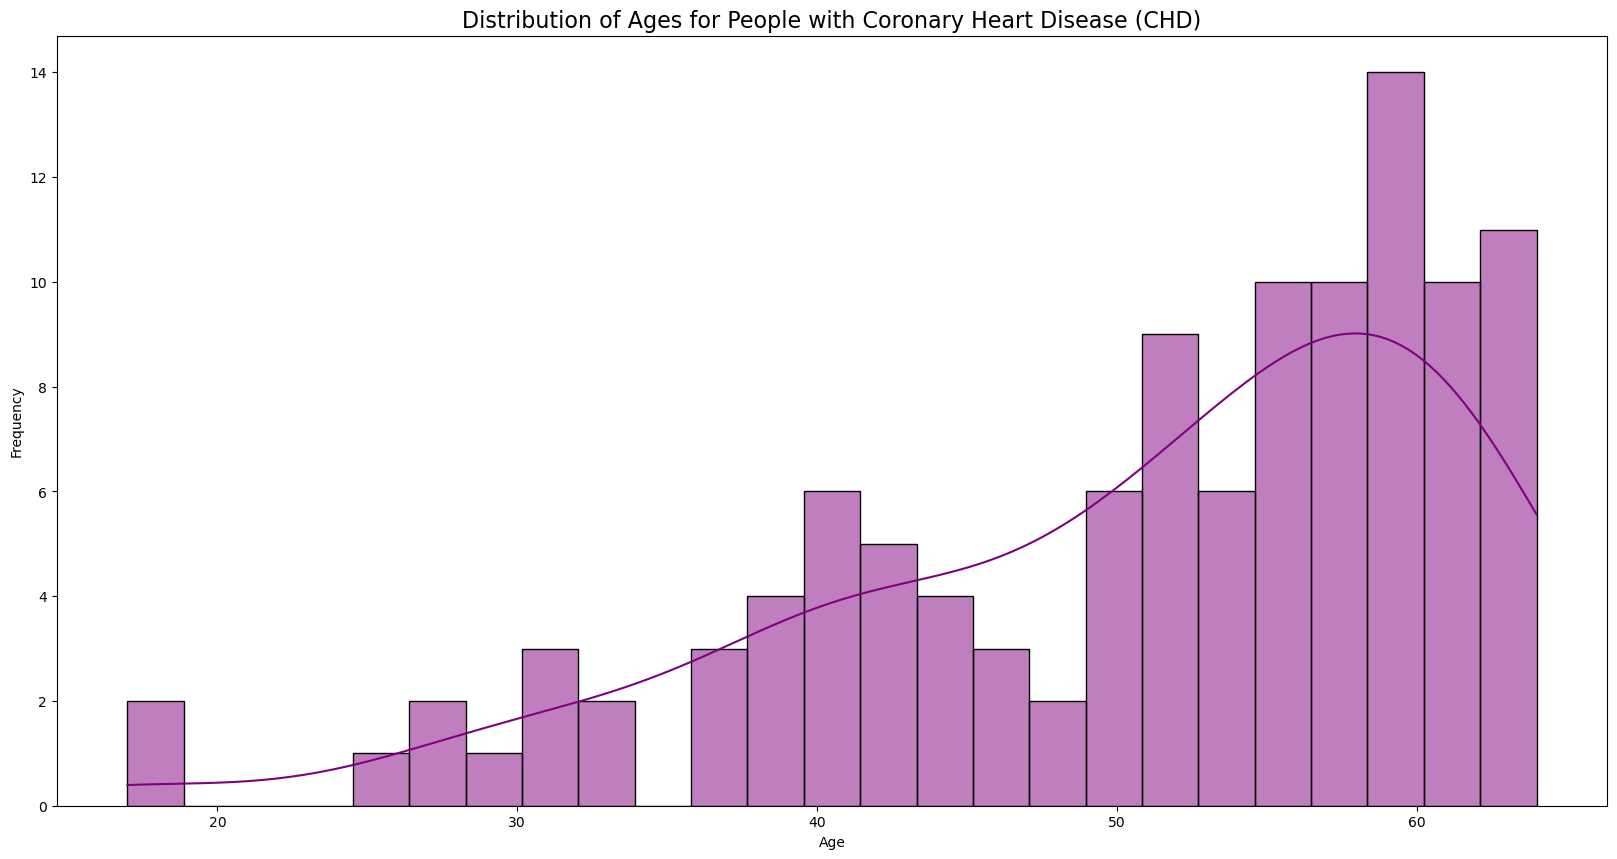

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

coronary_heart_disease_data = df[df['chd'] == 1]

plt.figure(figsize=(20, 10))
sns.histplot(coronary_heart_disease_data['age'], bins=25,kde=True , color='purple')

plt.title('Distribution of Ages for People with Coronary Heart Disease (CHD)', fontsize=16)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.show()


Inference : 
- more people with CHD are likely around the age of 60
- younger people are less likely to have CHD
- risk of CHD increases with age


3.7 Age groups whose survival rate is the largest

- create age bins to group by range 
- label the range 
- new column for the age group
- calculate the survival rate for each range of age
 
 (dividing the number of people who survived (CHD==0) in each age group / total number of people in each age group)
- Plot graph against Survival rate and age group 

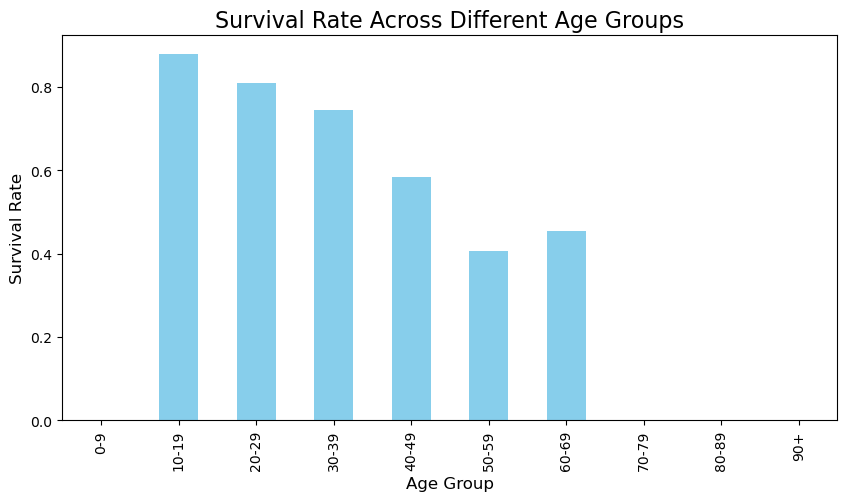

In [8]:

bins = [0,9,19,29, 39, 49, 59, 69, 79, 89, 100]  
labels = ['0-9','10-19','20-29','30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survival_rate = df[df['chd'] == 0].groupby('age_group',observed=False).size() / df.groupby('age_group',observed=False).size()

plt.figure(figsize=(10, 5))
survival_rate.plot(kind='bar', color='skyblue')

plt.title('Survival Rate Across Different Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

plt.show()


Survival Rate Across Different age groups graph helps to infer the following :
- The survival rate is highest in the age group of 10-19 years.
- The survival rate is lowest in the age group of 50-59 years.
- dataset is not large enough to make any conclusions about the survival rate across different age groups. - such as age  0-9 , 70 +


3.8 Relationship between ’famhist’ and ‘chd’.

Text(0, 0.5, 'Count')

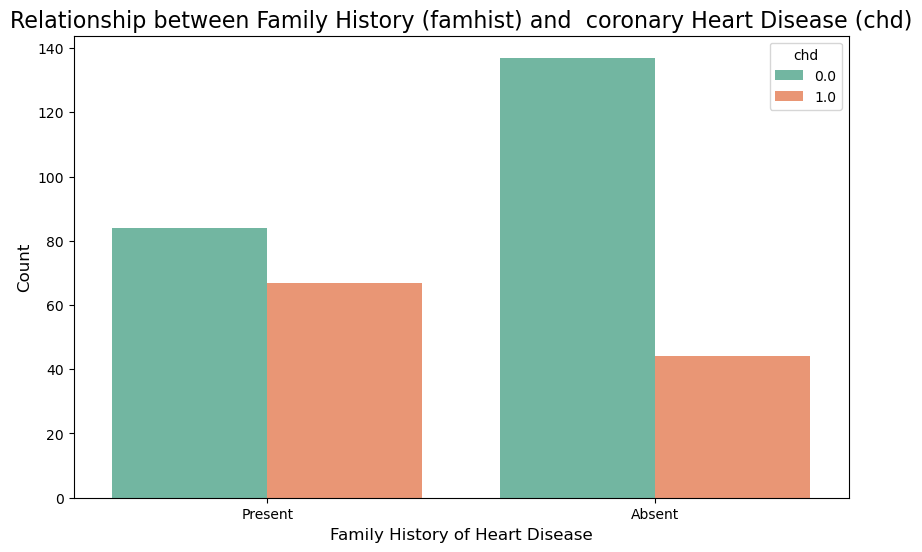

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='famhist', hue='chd', palette='Set2')

plt.title('Relationship between Family History (famhist) and  coronary Heart Disease (chd)', fontsize=16)
plt.xlabel('Family History of Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)


On ploting the graph we could infer the following:
 heart disease in family history (famhist)   - independent variable 
 occurance of heart disease (chd) - dependent variable

 probability of having heart disease (chd) given that there is a family history (famhist) of heart is higher than the  probability of having heart disease (chd) given that there is no family history (famhist)


3.9  visuals on data distributions 

i. Plot Correlation Matrix  
ii. Plot Scatter Matrix  
iii. Plot Per Column Distribution  
iiii. Plot a heat map for missing values


STEP : 
- load the data
- change the categorical value into  numerical  value - famhist 
- check the correlation matrix (consider  the numerical data only )
- heatmap the correlation matrix


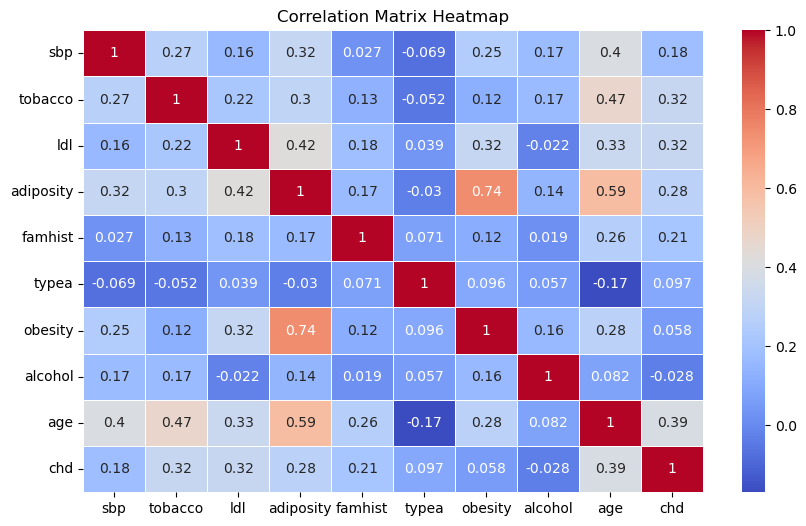

In [14]:

df = pd.read_csv("heart_dataset.csv")

df['famhist'] = df['famhist'].map({'Absent': 0, 'Present': 1})

correlation_matrix = df.corr()


plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


Inference: 

-Strong Positive Correlations (close to 1) - directly proportional eg : adiposity and  obesity are strongly correlated with 0.74

-Strong Negative Correlations (close to -1) - inversely proportional  eg: age and typea are strongly correlated with -0.83 ( or negativlely correlated - 0.17)

-Weak or No Correlation (close to 0) - not related to one other  eg : famhist and alcohol  are weakly correlated with 0.019

ii. Scatter Matrix :
Scatter matrix is a square matrix that is used to represent the covariance between the variables 

Scatter matrix is used to find the following: 

- eigenvectors and eigenvalues of the covariance matrix
- correlation between the variables 
- variance of the data
- standard deviation of the data
- covariance between the variables
        


[]

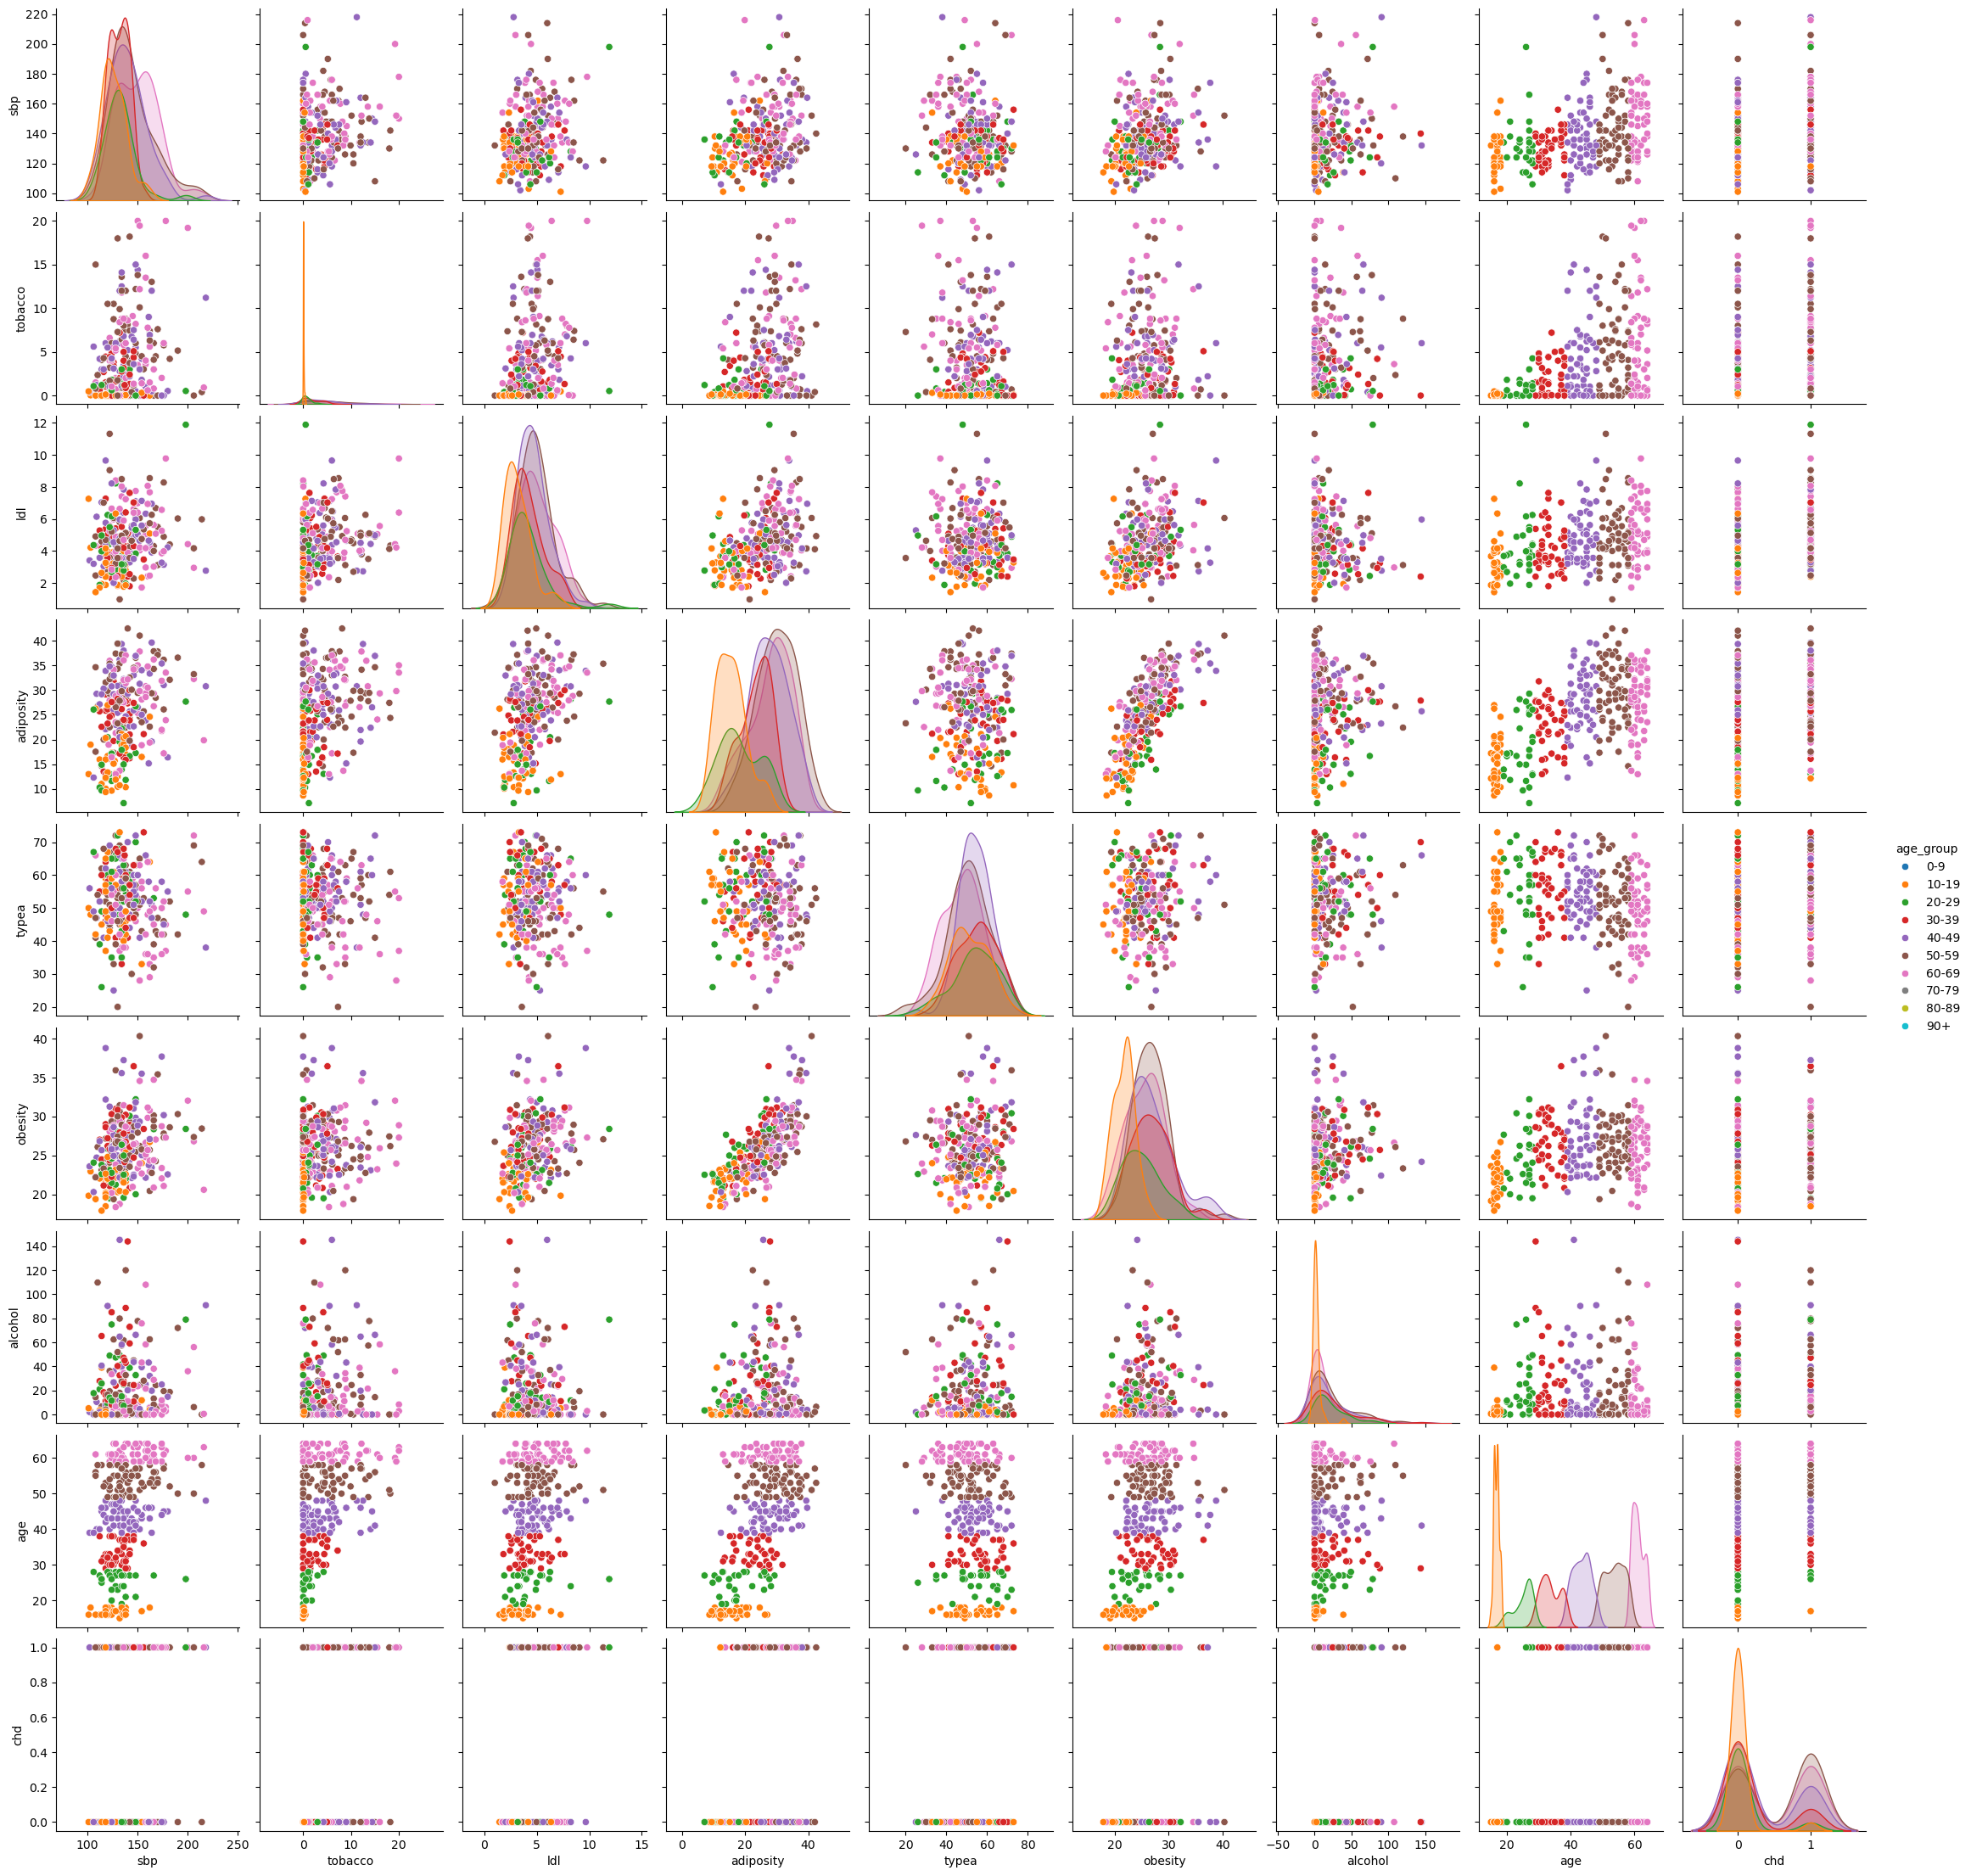

In [10]:
sns.pairplot(df,hue ="age_group")
plt.plot()

Different colors representing different age groups. 
each graphs is plotted between corresponding 2 factors. 

Distribution Patterns:

- The variables SBP, adiposity, obesity, and typea have relatively symmetric distributions.

- tobacco, alcohol, and CHD exhibit highly skewed distributions, with many values clustered near zero.

Correlations:

- There is a noticeable positive correlation between adiposity and obesity.

- There is a mild positive correlation between SBP and age. Higher age groups generally have higher blood pressure.

- A moderate positive correlation exists between obesity and SBP, suggesting that higher obesity levels tend to be associated with increased blood pressure.

Age-Related Trends:

- Older age groups (60-69, 70-79, 80+) show higher values in SBP, adiposity, and obesity, implying age as an influencing factor on these health measures.

- Younger age groups (10-19, 20-29) show generally lower values for most variables, highlighting better health indicators among younger populations.

CHD (Coronary Heart Disease):

- CHD is a binary variable, and the distribution indicates that the presence of CHD is relatively uncommon but increases noticeably in older age groups.

- People with higher values in SBP, tobacco, and obesity seem more likely to have CHD.



iii. per column distribution of the data


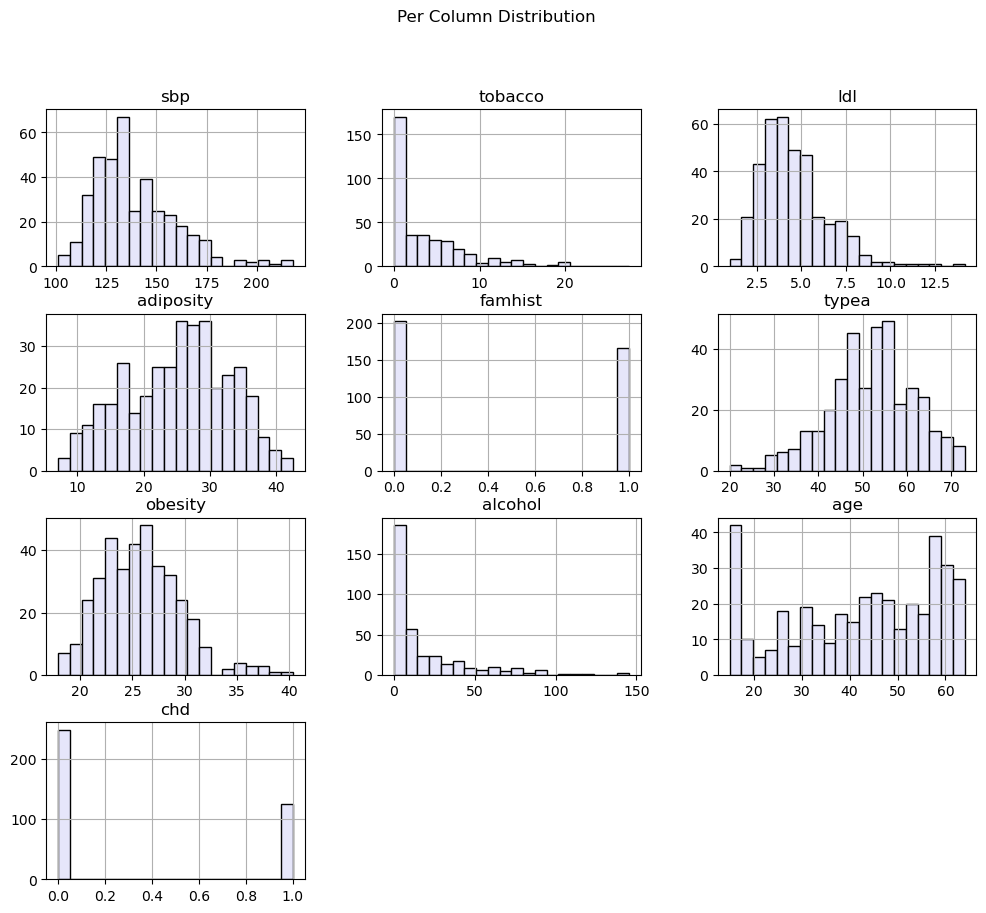

In [16]:
df.hist(figsize=(12, 10), bins=20, color = 'lavender', edgecolor="black")
plt.suptitle("Per Column Distribution")
plt.show()



SBP, adiposity, obesity, LDL, typea have roughly normal distributions; obesity and adiposity slightly elevated.

Tobacco, alcohol show highly skewed distributions; most individuals consume minimal amounts, but few extreme cases exist.

Family history: Majority have no family history of heart disease.

Age: Uniformly distributed (20-60+), providing diverse age representation.

CHD: Most individuals don't have coronary heart disease; presence likely linked to age, obesity, and lifestyle habits.

iv. Missing value HeatMap

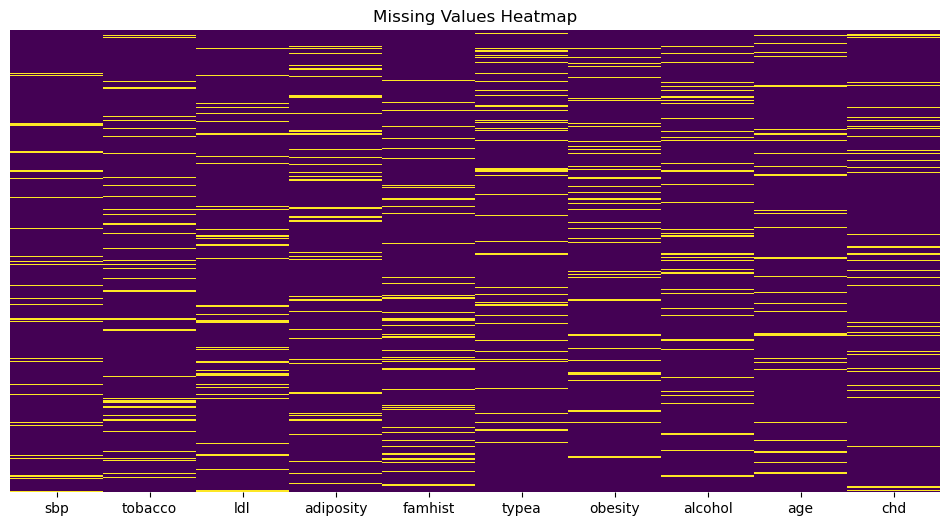

In [17]:
# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()


All the null values in the dataset is marked with different color to highlight the missing values. as the inpur is df.isnull  they are set to true and rest are set to be false. 


3.10  Additional  techniques  for  handling  null  values,  excluding the 'drop NA' feature.

-Replace missing values with the mean (for continuous data( sbp ,ldl , adiposity, obesity, tobacco, alcohol )), median (for skewed data (alcohol and tobacco as per the graph we could see they are skewed)), or mode (for categorical data).

-Propagate previous values (ffill) or next values (bfill) for missing entries in time-series datasets.

In [18]:
df['sbp'].fillna(round(df['sbp'].mean(),2), inplace=True)
df['ldl'].fillna(round(df['ldl'].mean(),2), inplace=True)
df['adiposity'].fillna(round(df['adiposity'].mean(),2), inplace=True)
df['obesity'].fillna(round(df['obesity'].mean(),2), inplace=True)

In [19]:
df['alcohol'].fillna(round(df['alcohol'].median(),2), inplace=True)
df['tobacco'].fillna(round(df['tobacco'].median(),2), inplace=True)

In [20]:
df['famhist'].fillna(df['famhist'].mode()[0], inplace=True)
df['chd'].fillna(df['chd'].mode()[0], inplace=True)
df['age'].fillna(df['age'].mode()[0], inplace=True)
df['typea'].fillna(df['typea'].mode()[0], inplace=True)

- Create a new CSV file with the filled DataFrame
- Choose file name and path
- index=False prevents writing the DataFrame index to the file

In [99]:
new_file_path = 'filled_data.csv'  
df.to_csv(new_file_path, index=False)  

print(f"DataFrame with filled missing values has been saved to: {new_file_path}")

DataFrame with filled missing values has been saved to: filled_data.csv


To cross check if there is any empty or missing values - running the following code:

In [21]:
import pandas as pd

df = pd.read_csv('filled_data.csv')

null_values = df.isnull().sum()

print(null_values)


sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [22]:
import pandas as pd

df = pd.read_csv('heart_dataset.csv')

null_values = df.isnull().sum()

print(null_values)


sbp          28
tobacco      40
ldl          39
adiposity    40
famhist      45
typea        41
obesity      40
alcohol      40
age          35
chd          39
dtype: int64


PART B


   1.Basic Matrix Multiplication
   
   Multiplies two matrices A and B. 
     
    Parameters: 
    A (numpy.ndarray): First matrix. 
    B (numpy.ndarray): Second matrix. 
     
    Returns: 
    numpy.ndarray: The product of matrices A and B.

STEPS : 

    -Iterate over rows of A
    -For each row, iterate over columns of B
    -iterate over the columns of the current row of A 
    -Multiply corresponding elements and sum them up
    

In [24]:
import numpy as np 

def matrix_multiply(A, B): 

    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    result = [[0]*cols_B for i in range(rows_A)]
    
    for i in range(rows_A):  
        for j in range(cols_B):  
            for k in range(cols_A):  
                result[i][j] += A[i][k] * B[k][j]
    return result                

A = np.array([[2021, 2022], 
            [2023, 2024]]) 
B = np.array([[22, 23],
            [24, 25]]) 
print(matrix_multiply(A, B))

[[92990, 97033], [93082, 97129]]


2. Solve a System of Linear Equations (20 pts) 
 
Write a Python function that solves a 2×2 system of linear equations given in matrix form Ax = b, 
where A is a coefficient matrix and b is a constant vector. Do not use numpy.linalg.solve() and 
build it from scratch.  
 
 
def solve_linear_system(A, b): 
"""  
Solves a 2x2 system of linear equations Ax = b.  
 
Parameters: A (list of lists): A 2x2 coefficient matrix. b (list): A 2-element constant vector.  
 
Returns: tuple: Solution (x1, x2), or None if the system has no unique solution.  
""" 

Ax = B 

A is Coefficient matrix 
x is unknown variables 
B is output matrix

 x = A^-1 * B


A = [[a, b], [c, d]]
A^-1 exist only if determinant det = ((a*d)- (b*c)) != 0
A^-1 = 1/det * [[d, -b], [-c, a]]




In [25]:
def inverse(input_matrix):
    a, b = input_matrix[0]
    c, d = input_matrix[1]

    determinant = (a * d) - (b * c)
    
    if determinant == 0:
        return "Error: Determinant is zero, inverse does not exist."
    
    invA = (1/determinant) * np.array([[d, -b], [-c, a]])
    return invA


def solve_linear_system(A, B): 
    A_inv = inverse(A)  
    
    if isinstance(A_inv, str):  # If inverse function returns an error
        return A_inv  

    # Ensure B is a column vector
    B = B.reshape(-1, 1)

    # Convert A_inv and B to lists for compatibility with matrix_multiply()
    A_inv_list = A_inv.tolist()
    B_list = B.tolist()

    # Multiply A_inv by B
    x = matrix_multiply(A_inv_list, B_list)
    
    return np.array(x).flatten()  # Convert result back to a 1D NumPy array

# Example matrices
A = np.array([[3, 4], [2, 5]]) 
B = np.array([7, 8]) 

# Solve the system
solution = solve_linear_system(A, B)
print("Solution x:\n", solution)

Solution x:
 [0.42857143 1.42857143]
